In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
#on charge les données
plant_data = pd.read_csv('data_viz_species_data.csv')
#plant_data.dropna()
plant_data.head()

,id,FAMILY,STRATUM,REGION OF ORIGIN,TYPE OF ECOSYSTEM,DISTRIBUTION,BIOME,LIFE CYCLE,ENVIRONMENTAL TOLERANCE,LIGHT REQUIREMENT,CO BENEFITS,SIZE,DIAMETER,SEEDS/KG
0,Name name,NaN,"Shrub,Tree,Liana,Herb,Subshrub,Palm",Native region,NaN,"Countries,Continent","Mata Atlântica,Amazônia","Perennial,Annual,Biannual","Drought,Acid soil,Degraded soil,Sandy soil,Var...","Low,Medium,High","Medicinal,Manure,Food,Wood,Material,Biodiversi...",m,cm,unit/kg
1,ce584b94-ddbe-40af-94e9-6d8180aad3b2,Brassicaceae,Herb,NaN,Any ecosystem,NaN,NaN,Annual,"Drought,Temperature",NaN,"Food,Medicinal",20-30,NaN,100000
2,c0853870-94a0-4d01-a2ca-8b04b225dee4,Boraginaceae,Tree,"Central America,French Guiana,Argentina","Amazon rainforest,Tropical forests","Central America,Tanzania,Kenya,West Indies,",Amani Nature Reserve,Perennial,NaN,NaN,"Wood,Shade,Food,Medicinal,Biofuel",15-45,35-100,71000
3,90540466-2500-4b8e-8068-504601819e20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8e582f5d-df18-49a7-bc93-f262b92ef804,Annonaceae,Shrub,NaN,Amazon rainforest,NaN,Amazonia,NaN,NaN,NaN,NaN,NaN,NaN,4000


In [6]:
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       135 non-null    object
 1   FAMILY                   126 non-null    object
 2   STRATUM                  127 non-null    object
 3   REGION OF ORIGIN         47 non-null     object
 4   TYPE OF ECOSYSTEM        98 non-null     object
 5   DISTRIBUTION             69 non-null     object
 6   BIOME                    40 non-null     object
 7   LIFE CYCLE               65 non-null     object
 8   ENVIRONMENTAL TOLERANCE  45 non-null     object
 9   LIGHT REQUIREMENT        10 non-null     object
 10  CO BENEFITS              75 non-null     object
 11  SIZE                     92 non-null     object
 12  DIAMETER                 22 non-null     object
 13  SEEDS/KG                 109 non-null    object
dtypes: object(14)
memory usage: 14.9+ KB


In [7]:
#famille les plus représentées
most_represented_families = plant_data['FAMILY'].value_counts()
most_represented_families.head(5)


FAMILY
Fabaceae         58
Solanaceae        6
Bignoniaceae      6
Annonaceae        5
Euphorbiaceae     5
Name: count, dtype: int64

In [21]:
#fonction pour afficher les graphiques
def plot_bar(data, title, xlabel, ylabel, rotation):
    plt.figure(figsize=(10, 5))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()
    

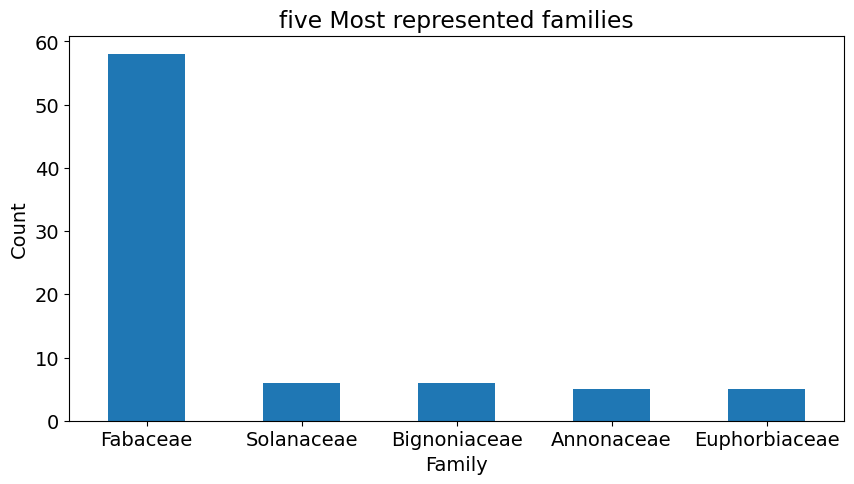

In [25]:
#plot the more represented families
plot_bar(most_represented_families.head(5), 'five Most represented families', 'Family', 'Count', 0)



In [23]:
#fonction pour separer les element dune colone par des virgules 
def extract_elements(data):
    result = []
    for i in data:
        x = i.split(',')
        for j in x:
            result.append(j)

    result = pd.Series(result)
    return result

In [26]:
#list all the differents cobenefits 
cobenefits = plant_data['CO BENEFITS']
cobenefits = cobenefits.dropna()
cobenefits = extract_elements(cobenefits)
cobenefits = pd.Series(cobenefits)

#on liste le nombre de fois que chacun apparait
print(cobenefits.value_counts()) 


Medicinal                                  53
Food                                       26
Biodiversity                               21
Wood                                       15
Material (with fruit)                      14
Material                                    9
Ornamental                                  6
Patrimonial                                 5
Manure                                      5
Shade                                       3
Fodder                                      3
Forage                                      2
Shading                                     1
Wood fabrication                            1
paper                                       1
construction for purposes such as beams     1
Honey production                            1
A red resin exudes from the bark            1
Dye                                         1
scantlings                                  1
laths and floor boards                      1
Dry fruit use as spice            

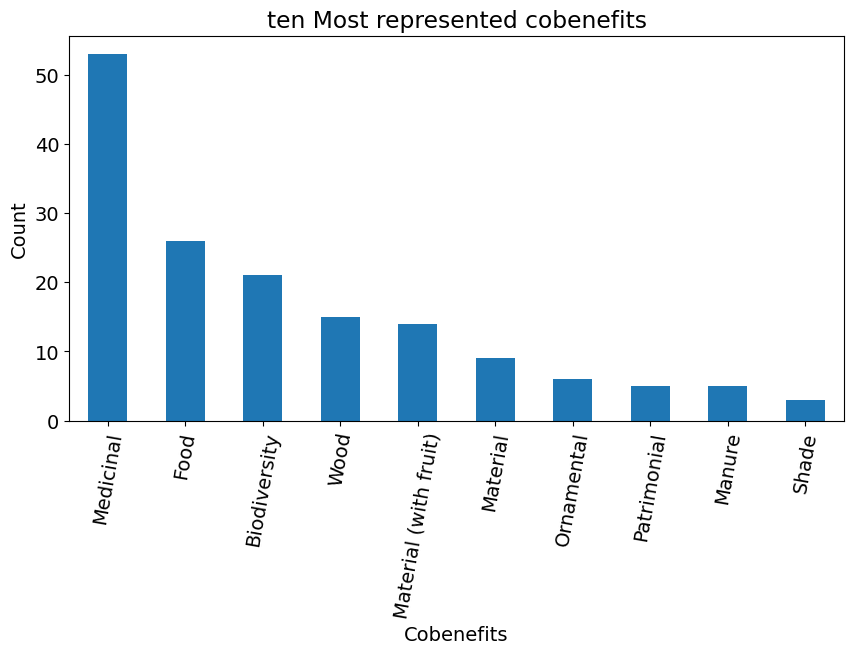

In [27]:
#plot the 10 most represented cobenefits

plot_bar(cobenefits.value_counts().head(10), 'Ten Most represented cobenefits', 'Cobenefits', 'Count', 80)

In [28]:
#fonction pour calcule la moyenne des valeurs d'une colonne lorsquelle est sous forme d'intervalle
def calculate_mean(data):
    result = []
    for i in data:
        if '-' in i:
            x = i.split('-')
            result.append((float(x[0]) + float(x[1]))/2)
        else:
            result.append(float(i))
    result = pd.Series(result)
    return result

In [32]:
#average, median and standard deviation of the size, diameter and seeds/kg columns
#plant_data.iloc[1:,:].describe()
plant = plant_data.iloc[1:,:]
plant_size = plant['SIZE'].dropna()
#pour les endroits avec intervale de valeur on prend la moyenne
plant_size = calculate_mean(plant_size)

print('la moyenne de size est :', plant_size.mean())
print('la mediane de size est :', plant_size.median())
print('l\'ecart type de size est :', plant_size.std())


la moyenne de size est : 14.274725274725276
la mediane de size est : 11.0
l'ecart type de size est : 12.172565633027167


la moyenne de la colonne size est : 14.274725274725276

la mediane de la colonne size est : 11.0

l'ecart type de la colonne size est : 12.172565633027167

In [33]:
#on fait la meme chose pour DIAMETER 
plant = plant_data.iloc[1:,:]
plant_dia = plant['DIAMETER'].dropna()
plant_dia = calculate_mean(plant_dia)

print('la moyenne de diameter est :', plant_dia.mean())
print('la mediane de diameter est :', plant_dia.median())
print('l\'ecart type de diameter est :', plant_dia.std())


la moyenne de diameter est : 56.13095238095238
la mediane de diameter est : 40.0
l'ecart type de diameter est : 36.6697780065222


la moyenne de la colonne diameter est : 56.13095238095238

la mediane de la colonne diameter est : 40.0

l'ecart type de la colonne diameter est : 36.6697780065222

In [34]:
#on fait la meme chose pour SEEDS/KG
plant = plant_data.iloc[1:,:]
plant_seed = plant['SEEDS/KG'].dropna()
plant_seed = calculate_mean(plant_seed)

print('la moyenne de seed est :', plant_seed.mean())
print('la mediane de seed est :', plant_seed.median())
print('l\'ecart type de seed est :', plant_seed.std())


la moyenne de seed est : 74607.86111111111
la mediane de seed est : 14950.0
l'ecart type de seed est : 161598.8491745861


la moyenne de la colonne seed est : 74607.86111111111

la mediane de la colonne seed est : 14950.0

l'ecart type de la colonne seed est : 161598.8491745861

<Figure size 1000x500 with 0 Axes>

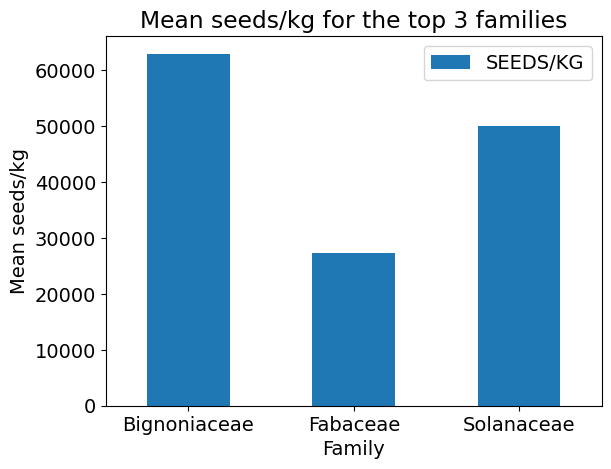

In [37]:
#for each of the top 3 families, calsulate the means seeds/kg
top3_families = most_represented_families.head(3).index
#on prend les données correspondant à ces familles
top3_families_data = plant_data[plant_data['FAMILY'].isin(top3_families)]
#on prend les données de seeds/kg pour chaque famile et on calcule la moyenne
top3_families_data.loc[:,'SEEDS/KG'] = pd.to_numeric(top3_families_data['SEEDS/KG'])

top3_families_data = top3_families_data.groupby('FAMILY').agg({'SEEDS/KG':'mean'})
#present your answer as a plot best suited to the situation.
plot_bar(top3_families_data, 'Mean seeds/kg for the top 3 families', 'Family', 'Mean seeds/kg', 0)

Text(0.5, 1.0, 'Correlation between Family, size and seeds')

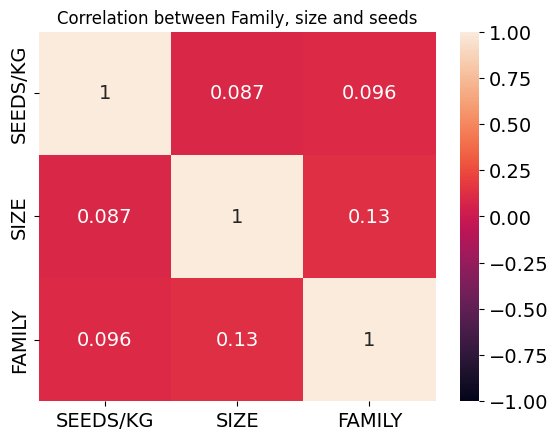

In [39]:
#verify if seeds/kg is correlated with size an family
plant = plant_data.iloc[1:,:]
plant = plant[['SEEDS/KG','SIZE','FAMILY']].dropna()
#on convertit les données en float
plant.loc[:,'SEEDS/KG'] = pd.to_numeric(plant['SEEDS/KG'])
result = calculate_mean(plant['SIZE']) 
plant.loc[:,'SIZE'] = result.values
#on cree un data frame qui contiendra  family, seed et size pour calculer coorelation
dataframe = plant[['SEEDS/KG','SIZE','FAMILY']]
#print(dataframe['FAMILY'].values)

#on converti les donnes de family en nombre:e
dataframe['FAMILY'] = pd.factorize(dataframe['FAMILY'])[0]
#dataframe['FAMILY'].values

heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation between Family, size and seeds', fontdict={'fontsize':12})



On remarque que les variables seeds/kg et size ne sont pas très correlées, de meme pour family et seeds/kg
Cependant, family et size le sont un peu plus

In [40]:
data = plant_data.iloc[1:,:][['id','REGION OF ORIGIN']].dropna()

result = extract_elements(data['REGION OF ORIGIN'])
result = result.value_counts()
result = pd.DataFrame(result)
result.reset_index(inplace=True)

result.columns = ['region', 'nombre_especes']
result

,region,nombre_especes
0,South America,17
1,Brazil,13
2,Central America,9
3,Bolivia,6
4,West Africa,5
5,Paraguay,4
6,Argentina,4
7,French Guiana,3
8,Tropical Africa,3
9,South Africa,2


C:\Users\carme\AppData\Local\Temp\ipykernel_12868\678748941.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


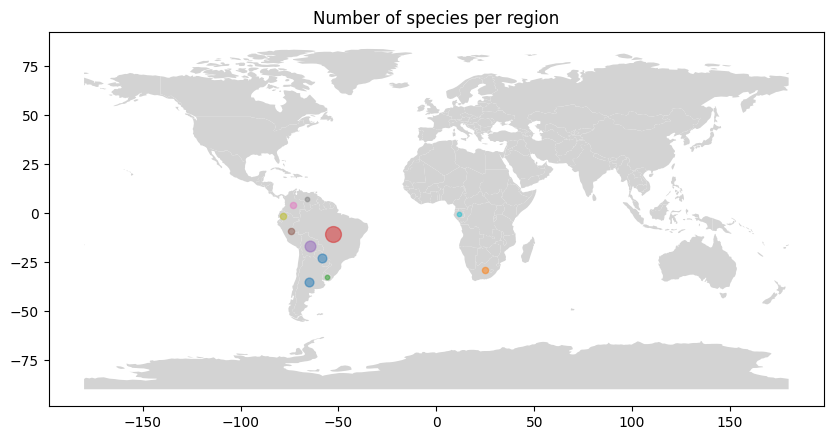

In [41]:
#figure qui affiche la carte du monde avec les symboles au centre des regions en fonction du nombre d'espece
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(result, left_on='name', right_on='region', how='left')

fig, ax = plt.subplots(figsize=(10, 10))

# Afficher toutes les régions du monde
world.plot(ax=ax, color='lightgrey')

# Placer des marqueurs ou des cercles sur les régions avec des espèces végétales
for idx, row in merged_data.iterrows():
    # Vérifier si la région a des espèces végétales
    if not pd.isnull(row['nombre_especes']):  
        ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=row['nombre_especes'] * 10, alpha=0.5)

plt.title('Number of species per region')
plt.show()